In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [232]:
train = pd.read_csv('./train.csv')  # 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
train.head() # 데이터 상위 5개를 확인합니다.

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [233]:
train.shape # 데이터를 모양을 확인합니다.

(1253, 10)

In [234]:
train.isnull().sum()

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [235]:
train = train.drop(columns=['id'],axis=1) # id 열을 제거해 줍니다.
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [236]:
temp = train['Target'].unique() # Target의 중복되지 않은 값을 출력합니다.
np.sort(temp) # 오름차순으로 정렬합니다.

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [237]:
train.groupby('Target').count().iloc[:,0] # Target 값 별로 데이터의 개수를 세어줍니다.

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

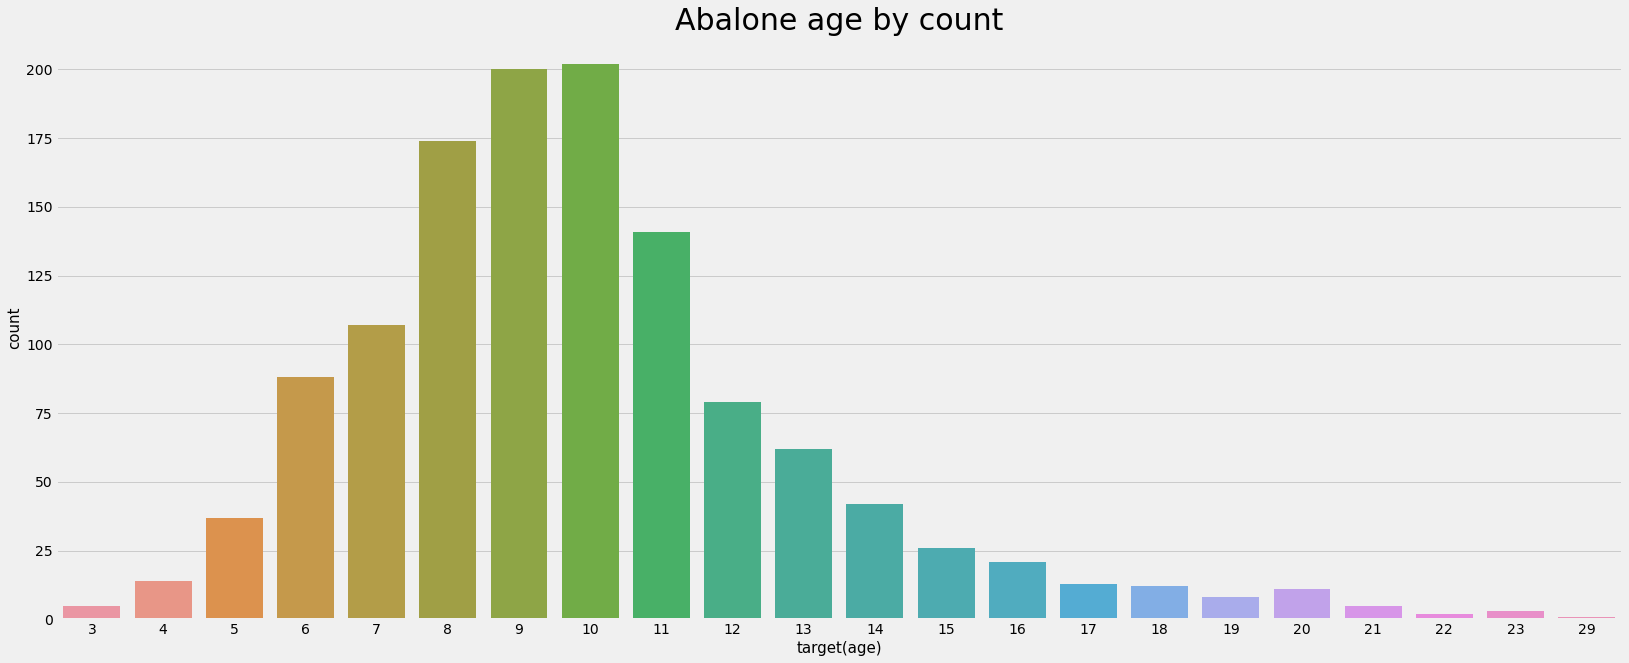

In [238]:
# 전복의 나이 분포 시각화
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target' , data=train)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [239]:
temp1 = train['Target'] == 29
temp2 = train['Target'] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합쳐서 보겠습니다.

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [240]:
train[train['Target'] == 3] # 가장 나이가 작은 3세의 데이터 프레임을 보겠습니다.

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [241]:
# 전체의 데이터 타입을 확인
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [242]:
print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.

['M' 'I' 'F']


In [243]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

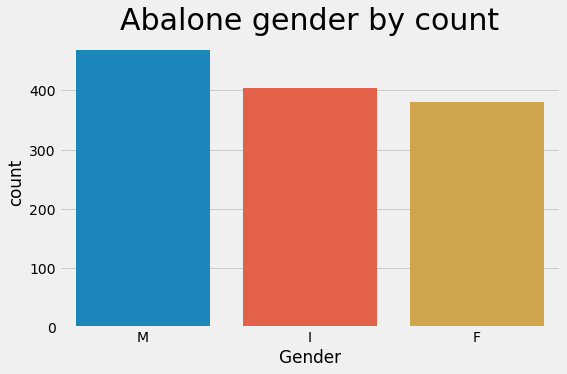

In [244]:
# 성별 데이터 개수 그래프
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data=train)
plt.title('Abalone gender by count', fontsize=30)
plt.show()

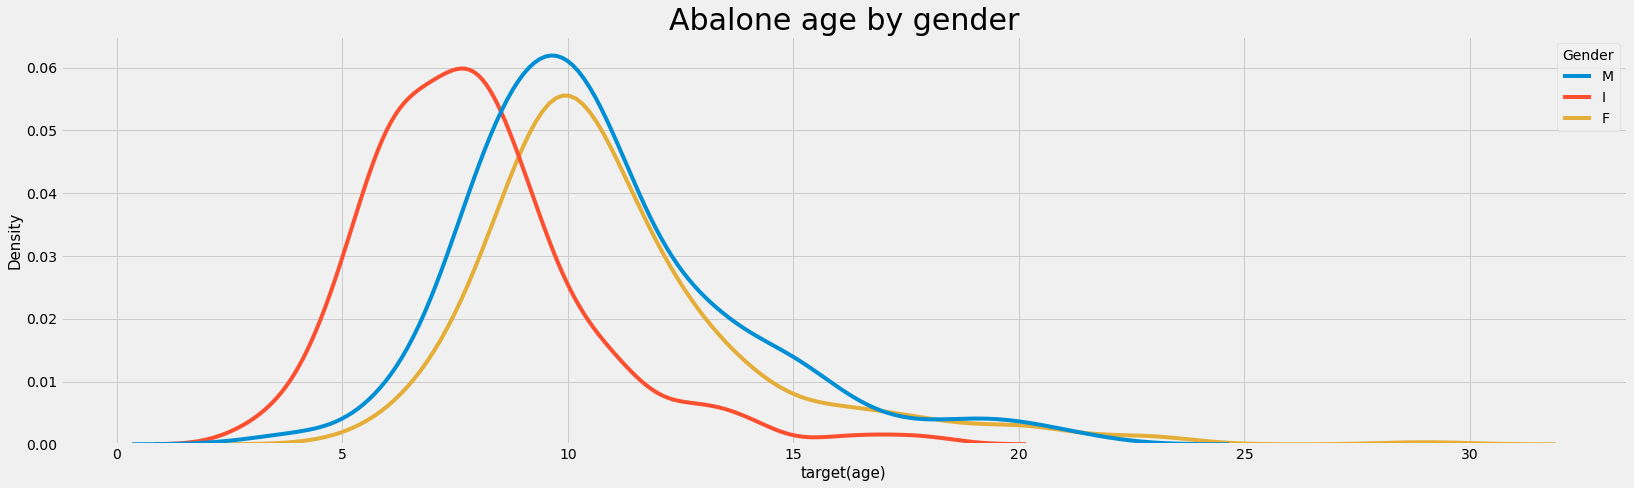

In [245]:
# 성별에 따른 나이 분포 그래프
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [246]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


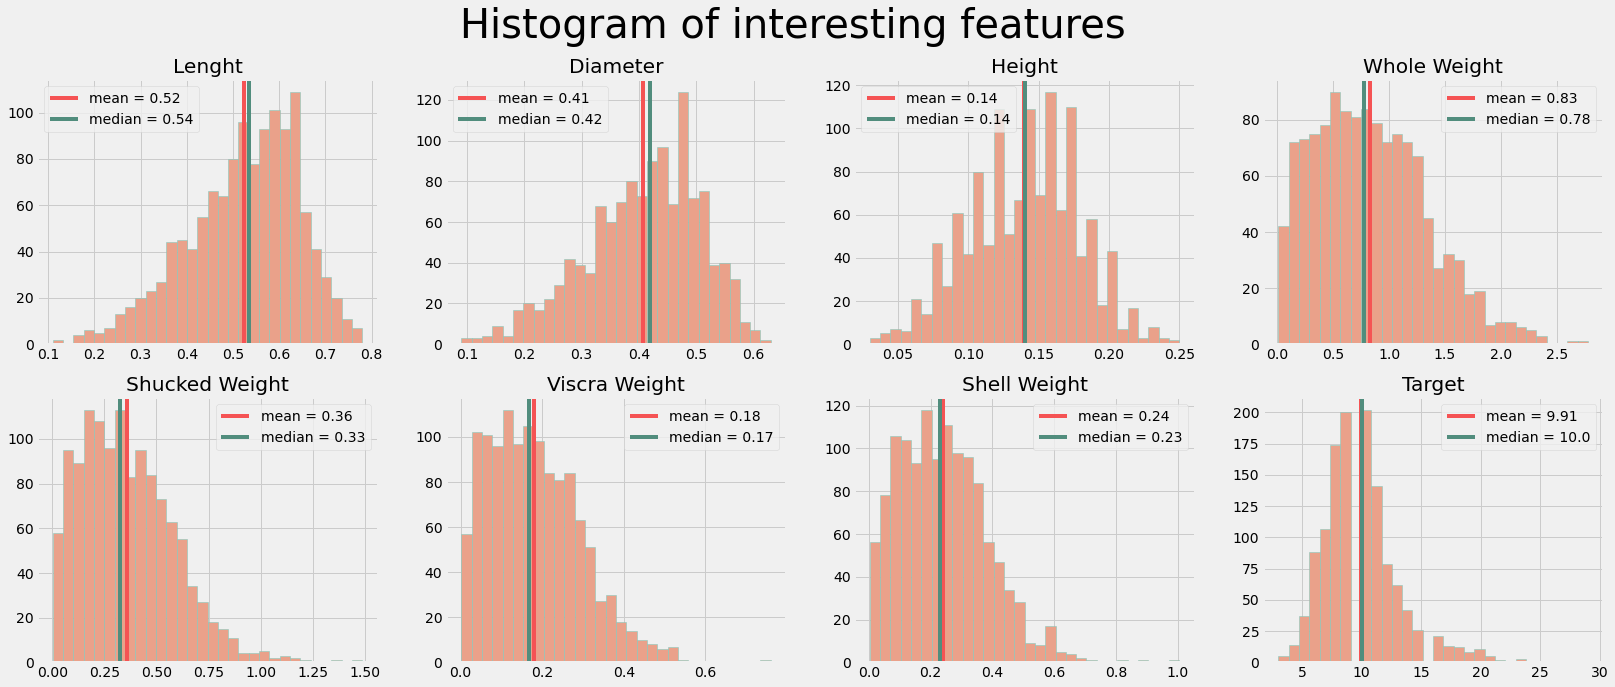

In [247]:
# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [248]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1), '입니다') #round를 하여 소수점 1의 자리까지 반올림 하였습니다.

전복의 평균 나이는 9.9 입니다


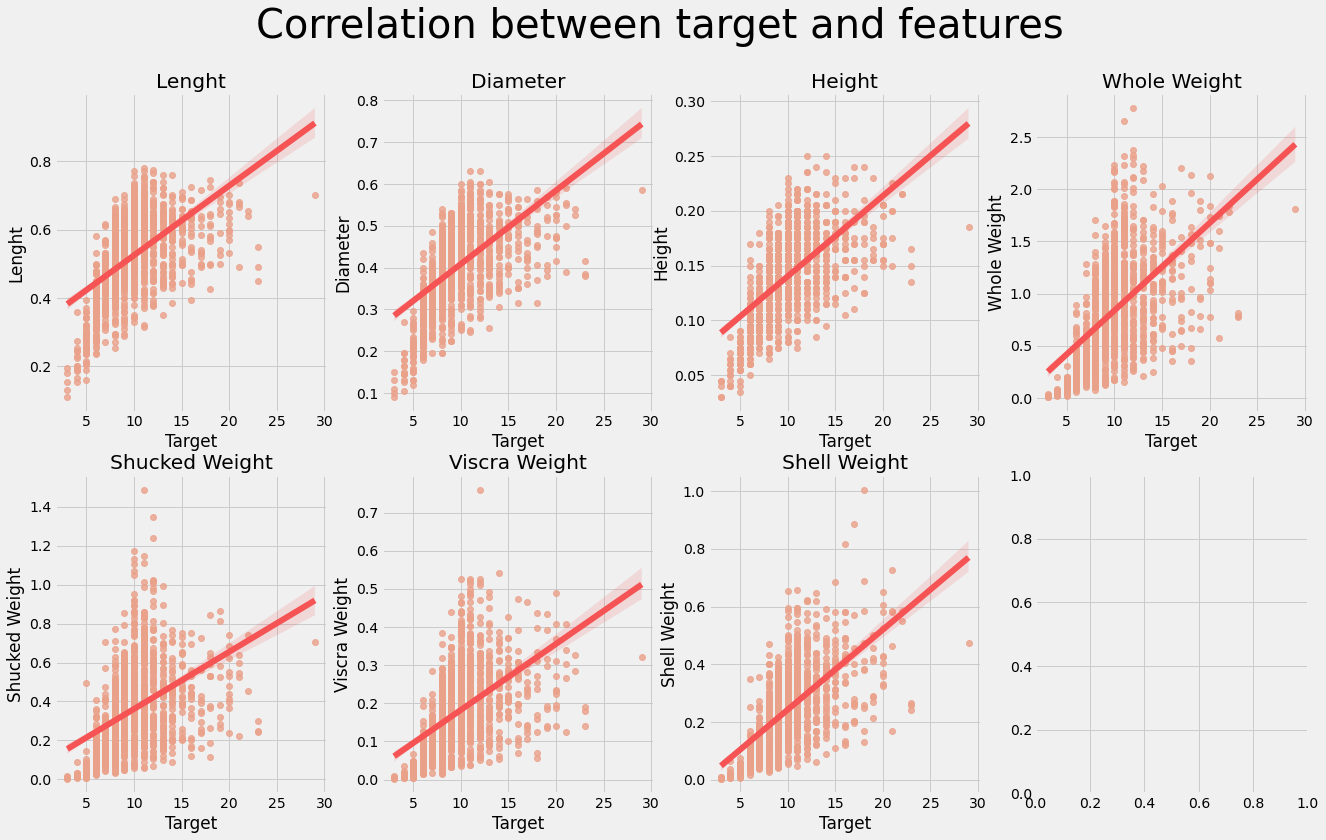

In [249]:
# 수치형 데이터 분포 Target과 상관관계 그래프
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train,  color='#eaa18a', line_kws=  {'color': '#f55354'} , ax = axx) # regplot을 이용하여 추세선과 산점도 그래프를 그려줍니다.
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

In [250]:
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

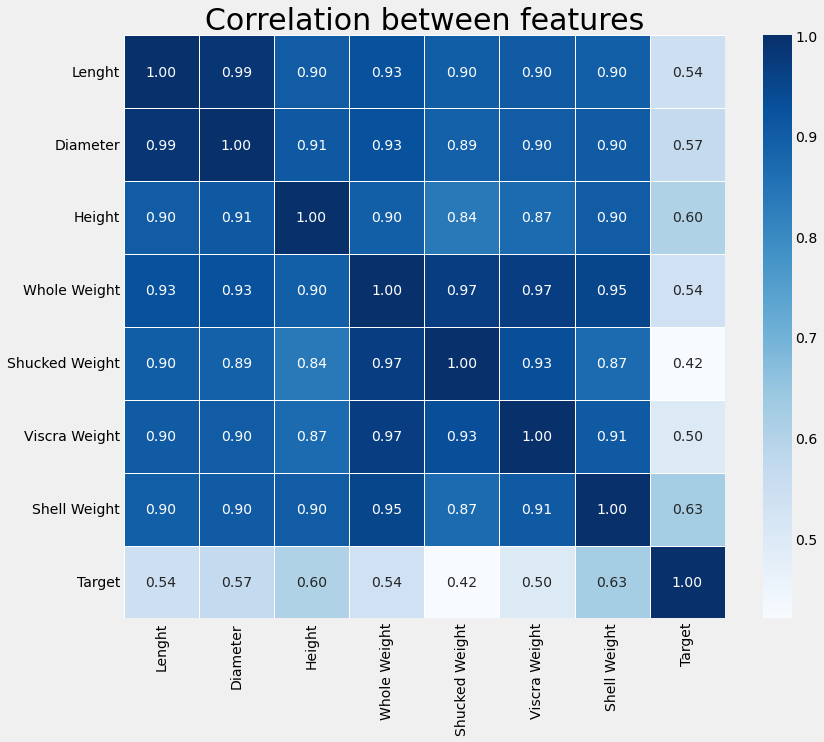

In [251]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [252]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.625819
Height,0.604654
Diameter,0.567933
Lenght,0.543789
Whole Weight,0.538404
Viscra Weight,0.497283
Shucked Weight,0.420126


In [253]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

# csv형식으로 된 데이터 파일을 읽어옵니다.
train_df = pd.read_csv('train.csv')
train_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [254]:
train_df[train_df["Target"]>20]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,217,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,449,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,554,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,630,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,736,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,763,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,793,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1132,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,1141,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1173,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [255]:
train_df = train_df.drop(index = [762], axis = 0)

In [256]:
train_df[train_df["Whole Weight"] < train_df["Shucked Weight"] + train_df["Shell Weight"]]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,848,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [257]:
train_df = train_df.drop(index = [47, 382, 435, 847, 1078], axis = 0)

In [258]:
train_df[train_df["Shucked Weight"] < train_df["Viscra Weight"]]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [259]:
train_df = train_df.drop(index = [465], axis = 0)

In [260]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    print(label_maps)
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

In [261]:
train_le = make_label_map(train_df[['Gender']])
gender_df = label_encoder(train_df[['Gender']], train_le)
train_df['Gender'] = gender_df[['Gender']]

{'Gender': {'unknown': 0, 'M': 1, 'I': 2, 'F': 3}}


In [262]:
train_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,1,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,2,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,1,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,2,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [263]:
train_x = train_df.drop(['id', 'Target'], axis=1)
train_y = train_df.Target

In [264]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() # 모델을 객체에 할당

model.fit(train_x, train_y) # 모델 학습

RandomForestRegressor()

In [265]:
# csv형식으로 된 데이터 파일을 읽어옵니다.
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [266]:
gender_df = label_encoder(test_df[['Gender']], train_le)
test_df['Gender'] = gender_df[['Gender']]

test_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,3,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,1,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,3,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [267]:
test_x = test_df.drop(['id'],axis=1)
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = model.predict(test_x)

In [268]:
# 제출용 Sample 파일을 불러옵니다
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [269]:
submission['Target'] = np.round(prediction)

# 데이터가 잘 들어갔는지 확인합니다
submission

,id,Target
0,1,8.0
1,2,13.0
2,3,5.0
3,4,12.0
4,5,10.0
...,...,...
2919,2920,4.0
2920,2921,7.0
2921,2922,9.0
2922,2923,10.0


In [270]:
submission.to_csv('submit_rf.csv', index=False)

In [271]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#모델들을 할당할 리스트를 만들어줍니다.
models = []

#모델들을 각각 할당하여 리스트에 추가합니다.
models.append(RandomForestRegressor(random_state=32))
models.append(LinearRegression())
models.append(GradientBoostingRegressor(learning_rate=0.06, criterion='mae', random_state=32))

#모델들을 할당한 리스트를 불러와 순차적으로 train 데이터에 학습을 시켜줍니다.
for model in models:
    model.fit(train_x, train_y)

In [272]:
# csv형식으로 된 데이터 파일을 읽어옵니다.
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [273]:
gender_df = label_encoder(test_df[['Gender']], train_le)
test_df['Gender'] = gender_df[['Gender']]

test_df.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,1,3,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,3,2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,4,1,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,5,3,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


In [274]:
test_x = test_df.drop(['id'],axis=1)

In [275]:
# 전처리가 완료된 테스트 데이터셋을 통해 본격적으로 학습한 모델로 추론을 시작합니다.
prediction = None

# 학습 된 모델들을 순차적으로 불러옵니다.
for model in models:
    # 각 모델들의 최종 회귀값들을 prediction에 모두 더해줍니다.
    if prediction is None:
        prediction = model.predict(test_x)
    else:
        prediction += model.predict(test_x)
        
# 앙상블에 참여한 모든 모델의 수 만큼 다시 나눠줍니다 (= 평균)
prediction /= len(models)

In [276]:
# 제출용 Sample 파일을 불러옵니다
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [277]:
submission['Target'] = np.round(prediction)

# 데이터가 잘 들어갔는지 확인합니다
submission

,id,Target
0,1,9.0
1,2,13.0
2,3,6.0
3,4,11.0
4,5,10.0
...,...,...
2919,2920,4.0
2920,2921,8.0
2921,2922,9.0
2922,2923,10.0


In [278]:
submission.to_csv('submit_sv.csv', index=False)